# 데이터 불러오기
## SELECT 문으로 불러오기

In [1]:
import pandas as pd
import numpy as np
import sqlite3

In [2]:
con = sqlite3.connect("lpoint.db", isolation_level=None)

In [3]:
# 01_DEMO
demo = pd.read_sql("SELECT * FROM DEMO", con, index_col=None)
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29913 entries, 0 to 29912
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   cust       29913 non-null  object
 1   ma_fem_dv  29913 non-null  object
 2   ages       29913 non-null  object
 3   zon_hlv    29913 non-null  object
dtypes: object(4)
memory usage: 934.9+ KB


In [4]:
# 06_LPAY
lpay = pd.read_sql("SELECT * FROM LPAY", con, index_col=None)
lpay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353184 entries, 0 to 353183
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   cust     353184 non-null  object
 1   rct_no   353184 non-null  int64 
 2   cop_c    353184 non-null  object
 3   chnl_dv  353184 non-null  int64 
 4   de_dt    353184 non-null  int64 
 5   de_hr    353184 non-null  int64 
 6   buy_am   353184 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 18.9+ MB


## 두 데이터 합치기

In [6]:
data = pd.merge(lpay, demo, on = 'cust', how = 'left')
data.head()

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am,ma_fem_dv,ages,zon_hlv
0,M629656521,210803210311226,A03,1,20210803,21,10900,남성,40대,Z04
1,M216016456,210803130167542,L01,2,20210803,13,6860,여성,40대,Z04
2,M205142844,210803140275112,A02,1,20210803,14,9000,여성,60대,Z17
3,M737010483,210803040637594,A06,2,20210803,4,36740,남성,40대,Z16
4,M707775545,210803140675502,A06,2,20210803,14,138500,남성,30대,Z11


In [8]:
data.columns = ['고객번호', '영수증번호', '제휴사', '채널구분', '이용일자', '이용시간', '이용금액', '성별', '연령대', '거주지분류대코드']
data.head()

,고객번호,영수증번호,제휴사,채널구분,이용일자,이용시간,이용금액,성별,연령대,거주지분류대코드
0,M629656521,210803210311226,A03,1,20210803,21,10900,남성,40대,Z04
1,M216016456,210803130167542,L01,2,20210803,13,6860,여성,40대,Z04
2,M205142844,210803140275112,A02,1,20210803,14,9000,여성,60대,Z17
3,M737010483,210803040637594,A06,2,20210803,4,36740,남성,40대,Z16
4,M707775545,210803140675502,A06,2,20210803,14,138500,남성,30대,Z11


In [9]:
data.to_csv("./data/lpay.csv", index = False, encoding='utf-8')

# 데이터 분석

In [10]:
data = pd.read_csv('./data/lpay.csv', encoding='utf-8')
data

,고객번호,영수증번호,제휴사,채널구분,이용일자,이용시간,이용금액,성별,연령대,거주지분류대코드
0,M629656521,210803210311226,A03,1,20210803,21,10900,남성,40대,Z04
1,M216016456,210803130167542,L01,2,20210803,13,6860,여성,40대,Z04
2,M205142844,210803140275112,A02,1,20210803,14,9000,여성,60대,Z17
3,M737010483,210803040637594,A06,2,20210803,4,36740,남성,40대,Z16
4,M707775545,210803140675502,A06,2,20210803,14,138500,남성,30대,Z11
...,...,...,...,...,...,...,...,...,...,...
353179,M470112503,210125110644545,A06,2,20210125,11,51800,여성,50대,Z16
353180,M470112503,210104210652271,A06,2,20210104,21,6440,여성,50대,Z16
353181,M748878049,210119200278240,A02,1,20210119,20,17600,여성,30대,Z10
353182,M748878049,210119180267206,A02,1,20210119,18,12400,여성,30대,Z10


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353184 entries, 0 to 353183
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   고객번호      353184 non-null  object
 1   영수증번호     353184 non-null  int64 
 2   제휴사       353184 non-null  object
 3   채널구분      353184 non-null  int64 
 4   이용일자      353184 non-null  int64 
 5   이용시간      353184 non-null  int64 
 6   이용금액      353184 non-null  int64 
 7   성별        353184 non-null  object
 8   연령대       353184 non-null  object
 9   거주지분류대코드  353184 non-null  object
dtypes: int64(5), object(5)
memory usage: 26.9+ MB


## 단순시각화

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

* A01~06 : 유통사
* B01: 숙박업종
* C01~2: 엔터테인먼트
* D01~2: F&B
* E01: 렌탈업종
* L00 : 기타 제휴사
* L01 : 비 제휴사

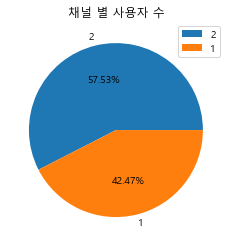

In [64]:
## 채널(1:오프라인 / 2:온라인) 구분
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.pie(data['채널구분'].value_counts().tolist(), labels=data['채널구분'].value_counts().keys(),
       autopct=lambda p : '{:.2f}%'.format(p))
plt.title('채널 별 사용자 수')
plt.legend()
plt.show()

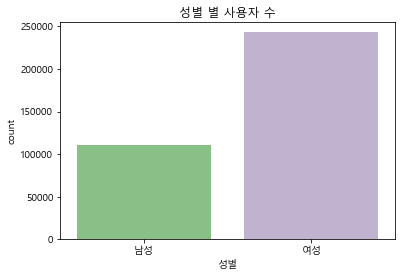

In [66]:
## 성별 별 사용자 수
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 깨짐 때문에 넣은 코드
plt.title('성별 별 사용자 수')
sns.countplot(x='성별', palette='Accent', data=data)
plt.show()

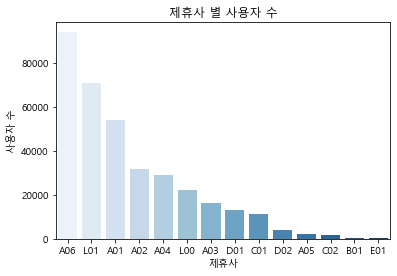

In [72]:
## 제휴사 별 사용자 수
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.countplot(data=data, x='제휴사', palette='Blues',
             order = data['제휴사'].value_counts().index)
plt.title('제휴사 별 사용자 수')
plt.ylabel('사용자 수')
plt.show()

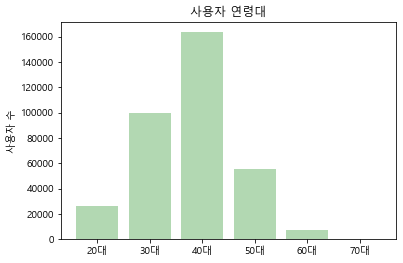

In [71]:
## 연령대 별 사용자 수
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.bar(x=data['연령대'].value_counts().sort_index().index,
        height=data['연령대'].value_counts().sort_index().tolist(),
        color = 'green', alpha = 0.3)
plt.title('사용자 연령대')
plt.ylabel('사용자 수')
plt.show()

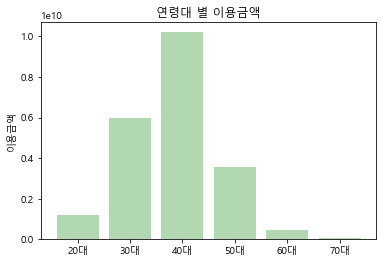

In [70]:
## 연령대 별 이용금액
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.bar(x=['20대', '30대', '40대', '50대', '60대', '70대'],
        height=data.groupby('연령대')['이용금액'].sum(),
        color = 'green', alpha = 0.3)
plt.title('연령대 별 이용금액')
plt.ylabel('이용금액')
plt.show()

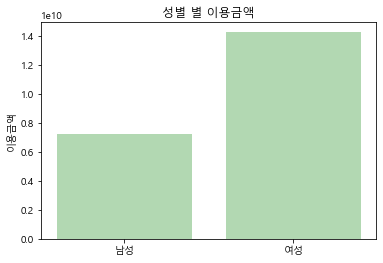

In [69]:
## 성별 별 이용금액
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.bar(x=['남성', '여성'],
        height=data.groupby('성별')['이용금액'].sum(),
        color = 'green', alpha = 0.3)
plt.title('성별 별 이용금액')
plt.ylabel('이용금액')
plt.show()

### 날짜 별 시각화

In [73]:
data['이용일자']

0         20210803
1         20210803
2         20210803
3         20210803
4         20210803
            ...   
353179    20210125
353180    20210104
353181    20210119
353182    20210119
353183    20210119
Name: 이용일자, Length: 353184, dtype: int64

In [77]:
data.이용일자 = data.이용일자.astype('str') 
data['이용일자'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 353184 entries, 0 to 353183
Series name: 이용일자
Non-Null Count   Dtype 
--------------   ----- 
353184 non-null  object
dtypes: object(1)
memory usage: 2.7+ MB


# 군집분석
## 필요한 라이브러리 불러오기

In [1]:
import sqlite3
import pandas as pd
import numpy as np

import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine

from sklearn.preprocessing import MinMaxScaler
from kmodes.kprototypes import KPrototypes

import time
from ipypb import ipb
from tqdm import tqdm_notebook

## 데이터 전처리

In [2]:
data = pd.read_csv('./data/lpay.csv', encoding='utf-8')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353184 entries, 0 to 353183
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   고객번호      353184 non-null  object
 1   영수증번호     353184 non-null  int64 
 2   제휴사       353184 non-null  object
 3   채널구분      353184 non-null  int64 
 4   이용일자      353184 non-null  int64 
 5   이용시간      353184 non-null  int64 
 6   이용금액      353184 non-null  int64 
 7   성별        353184 non-null  object
 8   연령대       353184 non-null  object
 9   거주지분류대코드  353184 non-null  object
dtypes: int64(5), object(5)
memory usage: 26.9+ MB


### 구매월 변수 추가

In [4]:
data['구매월'] = data['이용일자'].map(lambda x: str(x)[4:6]+'월')
data['채널구분'] = data['채널구분'].map(lambda x: str(x)+'번') # 채널구분을 카테고리컬하게 바꿔주기 위한 작업
data.head()

,고객번호,영수증번호,제휴사,채널구분,이용일자,이용시간,이용금액,성별,연령대,거주지분류대코드,구매월
0,M629656521,210803210311226,A03,1번,20210803,21,10900,남성,40대,Z04,08월
1,M216016456,210803130167542,L01,2번,20210803,13,6860,여성,40대,Z04,08월
2,M205142844,210803140275112,A02,1번,20210803,14,9000,여성,60대,Z17,08월
3,M737010483,210803040637594,A06,2번,20210803,4,36740,남성,40대,Z16,08월
4,M707775545,210803140675502,A06,2번,20210803,14,138500,남성,30대,Z11,08월


### 군집화에 사용할 변수 선택

In [6]:
dt = data[['성별', '연령대', '거주지분류대코드', '제휴사', '채널구분', '이용시간', '이용금액', '구매월']]

### 변수 스케일링

In [7]:
## 기존 수치형 변수에 대해서
scaled_X = MinMaxScaler().fit_transform(data[['이용시간', '이용금액']])
data[['이용시간', '이용금액']] = scaled_X

### 범주형 변수 확인

In [8]:
catcol = [dt.columns.get_loc(col) for col in list(dt.select_dtypes('object').columns)]
print('Categorical columns {}'.format(list(dt.select_dtypes('object').columns)))
print('Categorical columns position : {}'.format(catcol))

Categorical columns ['성별', '연령대', '거주지분류대코드', '제휴사', '채널구분', '구매월']
Categorical columns position : [0, 1, 2, 3, 4, 7]


### 데이터프레임을 행렬 형태로 전환

In [9]:
dfTomatrix = dt.to_numpy()
dfTomatrix

array([['남성', '40대', 'Z04', ..., 21, 10900, '08월'],
       ['여성', '40대', 'Z04', ..., 13, 6860, '08월'],
       ['여성', '60대', 'Z17', ..., 14, 9000, '08월'],
       ...,
       ['여성', '30대', 'Z10', ..., 20, 17600, '01월'],
       ['여성', '30대', 'Z10', ..., 18, 12400, '01월'],
       ['여성', '30대', 'Z10', ..., 15, 5000, '01월']], dtype=object)

## 군집분석
Elbow Method : Cluster 간의 거리의 합을 나타내는 값이 급격히 떨어지는 구간을 군집 개수로 설정

In [ ]:
# Choose optimal K using Elbow method
cost = []
for cluster in ipb(range(1, 7)):
    try:
        kprototype = KPrototypes(n_clusters = cluster, init = 'Huang',
                                 random_state = 0, verbose = True)
        kprototype.fit_predict(dfTomatrix, categorical = catcol)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
    time.sleep(0.1)

 [██████████████████████████████████████████████████##########] 5/6 [19:21:07<08:39:28, 13933.41s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 4.125648626587832e+16
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 4.125648626587832e+16
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 4.125648626587832e+16
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 4.125648626587832e+16
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 4.125648626587832e+16
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 0, ncost: 4.125648626587832e+16
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 0, ncost: 4.12564

Run: 10, iteration: 6/100, moves: 19, ncost: 1.5729807315053438e+16
Run: 10, iteration: 7/100, moves: 4, ncost: 1.572944264951602e+16
Run: 10, iteration: 8/100, moves: 0, ncost: 1.572944264951602e+16
Best run was number 1
Cluster initiation: 2
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 20447, ncost: 2.0296408723694196e+16
Run: 1, iteration: 2/100, moves: 20327, ncost: 1.4122391129590952e+16
Run: 1, iteration: 3/100, moves: 9958, ncost: 1.1740028976440914e+16
Run: 1, iteration: 4/100, moves: 3963, ncost: 1.0864239038993508e+16
Run: 1, iteration: 5/100, moves: 1486, ncost: 1.0667665340141232e+16
Run: 1, iteration: 6/100, moves: 609, ncost: 1.0611067743121476e+16
Run: 1, iteration: 7/100, moves: 211, ncost: 1.0602289868817372e+16
Run: 1, iteration: 8/100, moves: 69, ncost: 1.0601438258009374e+16
Run: 1, iteration: 9/100, moves: 23, ncost: 1.0601330293768646e+16
Ru

Run: 7, iteration: 11/100, moves: 6, ncost: 1.060126488354541e+16
Run: 7, iteration: 12/100, moves: 3, ncost: 1.0601262749696254e+16
Run: 7, iteration: 13/100, moves: 2, ncost: 1.060126224680248e+16
Run: 7, iteration: 14/100, moves: 0, ncost: 1.060126224680248e+16
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 8, iteration: 1/100, moves: 6418, ncost: 1.7768235759735426e+16
Run: 8, iteration: 2/100, moves: 5091, ncost: 1.2557278658262948e+16
Run: 8, iteration: 3/100, moves: 3648, ncost: 1.0981486126937886e+16
Run: 8, iteration: 4/100, moves: 1664, ncost: 1.069453899883765e+16
Run: 8, iteration: 5/100, moves: 761, ncost: 1.0616041231305054e+16
Run: 8, iteration: 6/100, moves: 265, ncost: 1.0602680727885018e+16
Run: 8, iteration: 7/100, moves: 87, ncost: 1.0601489687402324e+16
Run: 8, iteration: 8/100, moves: 28, ncost: 1.0601339447932314e+16
Run: 8, iteration: 9/100, moves: 12, ncost: 1.0601272

Run: 3, iteration: 20/100, moves: 7, ncost: 5745839207732695.0
Run: 3, iteration: 21/100, moves: 3, ncost: 5745838681049445.0
Run: 3, iteration: 22/100, moves: 1, ncost: 5745838616679493.0
Run: 3, iteration: 23/100, moves: 0, ncost: 5745838616679493.0
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 11451, ncost: 1.4776478916738266e+16
Run: 4, iteration: 2/100, moves: 4559, ncost: 1.0615169648345506e+16
Run: 4, iteration: 3/100, moves: 6512, ncost: 9595920882597834.0
Run: 4, iteration: 4/100, moves: 6088, ncost: 9440337593726448.0
Run: 4, iteration: 5/100, moves: 4249, ncost: 9351262971327824.0
Run: 4, iteration: 6/100, moves: 3351, ncost: 9216598975157960.0
Run: 4, iteration: 7/100, moves: 2497, ncost: 8338965457878840.0
Run: 4, iteration: 8/100, moves: 

Run: 8, iteration: 18/100, moves: 8, ncost: 5745839207732695.0
Run: 8, iteration: 19/100, moves: 3, ncost: 5745838681049445.0
Run: 8, iteration: 20/100, moves: 1, ncost: 5745838616679493.0
Run: 8, iteration: 21/100, moves: 0, ncost: 5745838616679493.0
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 7341, ncost: 1.512063369780313e+16
Run: 9, iteration: 2/100, moves: 14665, ncost: 1.1061523916602512e+16
Run: 9, iteration: 3/100, moves: 17783, ncost: 9824611854858930.0
Run: 9, iteration: 4/100, moves: 14574, ncost: 9543049173649866.0
Run: 9, iteration: 5/100, moves: 7964, ncost: 9437711251784538.0
Run: 9, iteration: 6/100, moves: 4658, ncost: 9342698081829950.0
Run: 9, iteration: 7/100, moves: 3498, ncost: 9205234430958664.0
Run: 9, iteration: 8/100, moves: 2487, ncost: 8243434668766665.0
Run: 9, iteration: 9/100, moves: 2122, ncost: 6238656945018498.0
Run: 9, iteratio

Run: 3, iteration: 9/100, moves: 11999, ncost: 5071152230666203.0
Run: 3, iteration: 10/100, moves: 10418, ncost: 4940821592121939.0
Run: 3, iteration: 11/100, moves: 6990, ncost: 4873452627418015.0
Run: 3, iteration: 12/100, moves: 4156, ncost: 4847572632891317.0
Run: 3, iteration: 13/100, moves: 2543, ncost: 4834570869008995.0
Run: 3, iteration: 14/100, moves: 1562, ncost: 4828553050174055.0
Run: 3, iteration: 15/100, moves: 959, ncost: 4825503024847429.0
Run: 3, iteration: 16/100, moves: 548, ncost: 4824656078193117.0
Run: 3, iteration: 17/100, moves: 280, ncost: 4824273871813765.0
Run: 3, iteration: 18/100, moves: 264, ncost: 4824092285622733.0
Run: 3, iteration: 19/100, moves: 110, ncost: 4824063101605798.0
Run: 3, iteration: 20/100, moves: 36, ncost: 4824059633063736.0
Run: 3, iteration: 21/100, moves: 22, ncost: 4824036629688433.0
Run: 3, iteration: 22/100, moves: 70, ncost: 4823992268354602.0
Run: 3, iteration: 23/100, moves: 42, ncost: 4823984483040420.0
Run: 3, iteration: 24/

Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 32906, ncost: 1.6341385049468784e+16
Run: 7, iteration: 2/100, moves: 20734, ncost: 1.057584079170181e+16
Run: 7, iteration: 3/100, moves: 8154, ncost: 9161034872970274.0
Run: 7, iteration: 4/100, moves: 6643, ncost: 8893956570500190.0
Run: 7, iteration: 5/100, moves: 10427, ncost: 8473090372345090.0
Run: 7, iteration: 6/100, moves: 12615, ncost: 5763408667325843.0
Run: 7, iteration: 7/100, moves: 10600, ncost: 5142787355969012.0
Run: 7, iteration: 8/100, moves: 10102, ncost: 4960437798434265.0
Run: 7, iteration: 9/100, moves: 7259, ncost: 4880511717976030.0
Run: 7, iteration: 10/100, moves: 4470, ncost: 4850019843945895.0


Run: 10, iteration: 21/100, moves: 22, ncost: 4824036629688433.0
Run: 10, iteration: 22/100, moves: 70, ncost: 4823992268354602.0
Run: 10, iteration: 23/100, moves: 42, ncost: 4823984483040420.0
Run: 10, iteration: 24/100, moves: 14, ncost: 4823984163928669.0
Run: 10, iteration: 25/100, moves: 1, ncost: 4823984161510725.0
Run: 10, iteration: 26/100, moves: 0, ncost: 4823984161510725.0
Best run was number 1
Cluster initiation: 5
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 64816, ncost: 1.5949653387257092e+16
Run: 1, iteration: 2/100, moves: 13740, ncost: 1.0181680351432632e+16
Run: 1, iteration: 3/100, moves: 4267, ncost: 8874957580073133.

In [ ]:
# Elbow 메소드 시각화
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 7), 'Cost':cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)